In [52]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr
import warnings

In [53]:
data=pd.read_csv('UV_SIGMA_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
datos = data
datos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       71 non-null     float64
 1   B       71 non-null     float64
 2   C       71 non-null     float64
dtypes: float64(3)
memory usage: 2.2 KB


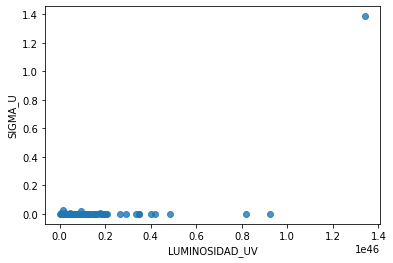

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos.A, y=datos.C, alpha= 0.8)
ax.set_xlabel('LUMINOSIDAD_UV')
ax.set_ylabel('SIGMA_U');

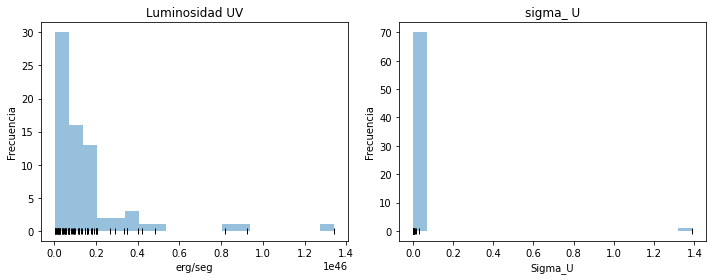

In [55]:


# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=datos.A, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(datos.A, np.full_like(datos.A, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Luminosidad UV')
axs[0].set_xlabel('erg/seg')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(x=datos.C, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(datos.C, np.full_like(datos.C, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('sigma_ U')
axs[1].set_xlabel('Sigma_U')
axs[1].set_ylabel('Frecuencia')


plt.tight_layout();



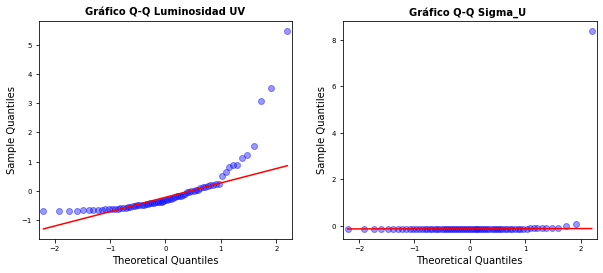

In [56]:
# Gráfico Q-Q
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    datos.A,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q Luminosidad UV', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    datos.C,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q Sigma_U ', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

In [57]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(datos.A)
print(f"Variable Luminosidad UV: {shapiro_test}")
shapiro_test = stats.shapiro(datos.C)
print(f"Variable Sigma_U: {shapiro_test}")

Variable Luminosidad UV: ShapiroResult(statistic=nan, pvalue=1.0)
Variable Sigma_U: ShapiroResult(statistic=0.10557830333709717, pvalue=1.0795593111048209e-18)


In [58]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(datos.A)
print(f"Variable Luminosidad UV : Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(datos.C)
print(f"Variable Sigma_U: Estadítico = {k2}, p-value = {p_value}")

Variable Luminosidad UV : Estadítico = 77.89437474682572, p-value = 1.2174508523570379e-17
Variable Sigma_U: Estadítico = 154.85817950994038, p-value = 2.3603346429076218e-34


Variable Luminosidad UV: ShapiroResult(statistic=0.9879428148269653, pvalue=0.7336677312850952)


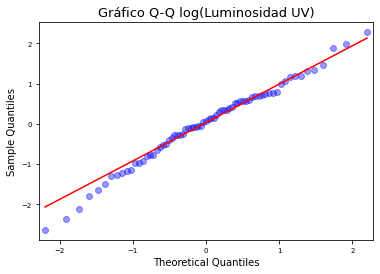

In [59]:
# Transformación logarítmica de los datos
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

sm.qqplot(
    np.log(datos.A),
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q log(Luminosidad UV)', fontsize = 13)
ax.tick_params(labelsize = 7)


shapiro_test = stats.shapiro(np.log(datos.A))
print(f"Variable Luminosidad UV: {shapiro_test}")

In [60]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', datos['C'].corr(datos['A'], method='pearson'))
print('Correlación spearman: ', datos['C'].corr(datos['A'], method='spearman'))
print('Correlación kendall: ', datos['C'].corr(datos['A'], method='kendall'))

Correlación Pearson:  0.6501805958113842
Correlación spearman:  -0.07299098727855327
Correlación kendall:  -0.04431019366695007


In [61]:


# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix



,A,B,C
A,1.000000,0.753188,0.650181
B,0.753188,1.000000,0.539255
C,0.650181,0.539255,1.000000


In [62]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,A,B,0.753188,0.753188
3,B,A,0.753188,0.753188
2,A,C,0.650181,0.650181
6,C,A,0.650181,0.650181
5,B,C,0.539255,0.539255
7,C,B,0.539255,0.539255


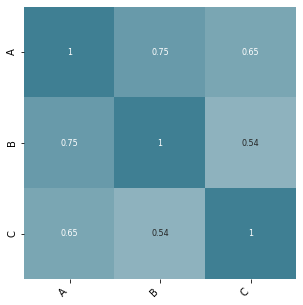

In [63]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)